In [70]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi
def run(Da,Db,it,option):
    L=6.5
    N=100
    kaf=100
    run=0
    correct='new'

    shift=0
    rm = 0.005
    run+=shift
    rng = GSLRandomNumberGenerator()
    rng.seed(run)
    D = 1
    kd= 4.0*math.pi*D
    ka = kaf*kd
    f=1.0208582         
    if correct=='new':
        gamma=0.577216
        factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
        PP=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*gamma)/2/math.pi)
        ka = PP*D/factor            
    
    voxelr=rm*f
    td = (2*voxelr)**2/4/D
    tsimexp = td/PP
    #print(tsimexp)
    H = 3*voxelr*2
    ori = Real3(0.5*H,0,0)
    unit0 = Real3(0,0,L)
    unit1 = Real3(0,L,0)
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
    size=tuple(w.calculate_shape(Real3(H,L,L),voxelr))
    Nmv=size[1]*size[2]
    
    lx,ly,lz=w.actual_lengths()
    Area = ly*lz
    kat=2*sqrt(3)*D*PP
    print("N",N,"Ns",Nmv,'expected',N*N/Nmv,'Area',Area,'tsim',tsimexp,'kat',kat)
    with species_attributes():
        A |  {'D': str(Da), 'radius':str(voxelr),'location':'X'}
        B |  {'D': str(Db), 'radius':str(voxelr),'location':'X'}           

    with reaction_rules():#for spa and egfrd
        A + B > B | ka

    m2 = get_model()
    w.bind_to(m2)
    w.add_structure(Species('X'),PlanarSurface(ori,unit0,unit1))
    sim = spatiocyte.SpatiocyteSimulator(w)
    DN = []
    cnt=0
    for i in range(it):
        cnt+=1 
        w.add_molecules(Species('A'), N)
        w.add_molecules(Species('B'), N)  
        sim.initialize()
        tsim = sim.dt()
        sim.set_t(0)
        if option=='manual':
            sim.step()
            res = w.num_particles_exact(Species('A'))
        elif option=='auto':
            obs = FixedIntervalNumberObserver(tsimexp,['A'])
            sim.run(tsimexp,obs) 
            res=obs.data()[1]
            #print(res)
            res=res[1]
        dn = N-res
        DN.append(dn)        
        res = w.num_particles_exact(Species('A'))
        w.remove_molecules(Species('A'),res)
        w.remove_molecules(Species('B'),N)
        assert(w.num_particles_exact(Species('A'))==0)
        assert(w.num_particles_exact(Species('B'))==0)
    return DN


N 100 Ns 469568 expected 0.021296170096769797 Area 42.379903933586725 tsim 2.8403327892642647e-07 kat 317.7548934638077
Da=1 0.020875
311.4707184867527


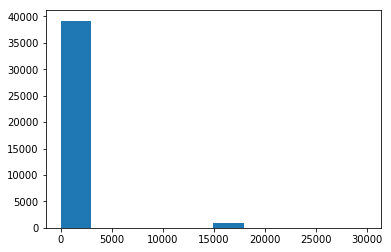

In [71]:
it=40000
opt = 'manual'
dn=run(0,1,int(it),opt)
print('Da=1',np.mean(dn))
#x,y=np.histogram(dn,bins=10,range=(0,2))
#plt.plot(0.5*(y[1:]+y[0:-1]),x,'o',label='Da=1')

tsim = 2.8403327892642647e-07
area = 42.379903933586725
kap = np.array(dn)*area/100/100/tsim
plt.hist(kap)#,range(0,400))
print(np.mean(kap))

N 100 Ns 11400 expected 0.8771929824561403
Da=1 0.945
N 100 Ns 11400 expected 0.8771929824561403
Db=1 0.872


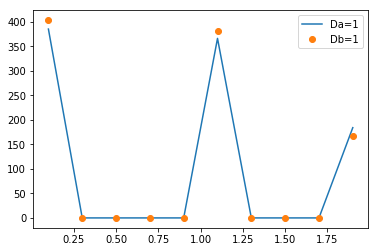

In [35]:
it=1e3
dn =run(1,0,int(it))
print('Da=1',np.mean(dn))
x,y=np.histogram(dn,bins=10,range=(0,2))
plt.plot(0.5*(y[1:]+y[0:-1]),x,'-',label='Da=1')

dn =run(0,1,int(it))
print('Db=1',np.mean(dn))
x,y=np.histogram(dn,bins=10,range=(0,2))
plt.plot(0.5*(y[1:]+y[0:-1]),x,'o',label='Db=1')
plt.legend()

N 100 Ns 11400 expected 0.8771929824561403
Da=1 0.8827
N 100 Ns 11400 expected 0.8771929824561403
Db=1 0.87513


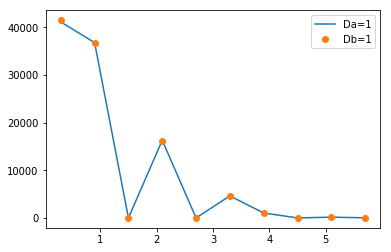

In [37]:
it=1e5
dn =run(1,0,int(it))
print('Da=1',np.mean(dn))
x,y=np.histogram(dn,bins=10,range=(0,6))
plt.plot(0.5*(y[1:]+y[0:-1]),x,'-',label='Da=1')

dn =run(0,1,int(it))
print('Db=1',np.mean(dn))
x,y=np.histogram(dn,bins=10,range=(0,6))
plt.plot(0.5*(y[1:]+y[0:-1]),x,'o',label='Db=1')
plt.legend()

N 100 Ns 11400 expected 0.8771929824561403
0.872


(array([403.,   0., 381.,   0., 166.,   0.,  42.,   0.,   7.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

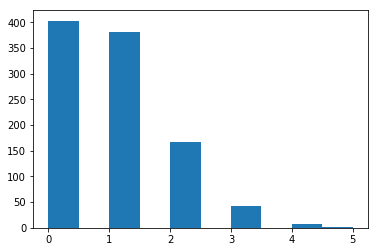

In [7]:
dn =run(0,1,int(1e3))
print(np.mean(dn))
plt.hist(dn,bins=10)

In [8]:
a,b=sim.last_reactions()[0]

In [10]:
a.as_string()

'A+B>B|316.453'

In [28]:
b.t()

8.520998367792794e-07

In [16]:
sim.num_steps()

3

In [20]:
w.num_particles_exact(Species('A'))

98